<a href="https://colab.research.google.com/github/sarathkumar271002/Binary_predictors/blob/main/Binary_predictors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine learning**
# *Supervised learning - Classification*
# *Dependent - Admitted (Target variable) (Category)*
# *Independent - Marks and Gender (Predictor variable)*

# **Importing** **libraries**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

# **Data - read it using pandas dataframe**

In [ ]:
df=pd.read_csv("/content/Binary predictors.csv")
df

,Marks,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male
...,...,...,...
163,1722,Yes,Female
164,1750,Yes,Male
165,1555,No,Male
166,1524,No,Male


In [ ]:
df["Admitted"]=df["Admitted"].replace({"Yes":1,"No":0})
df["Gender"]=df["Gender"].replace({"Male":5,"Female":10})
df.head()

,Marks,Admitted,Gender
0,1363,0,5
1,1792,1,10
2,1954,1,10
3,1653,0,5
4,1593,0,5


#**Defining the independent and dependent variable**

# Independent - Marks
# Dependent - Admitted

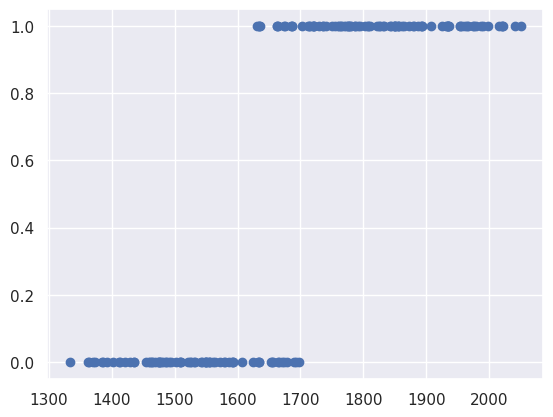

In [ ]:
x1=df["Marks"]
y=df["Admitted"]
sns.set()
plt.scatter(x1,y)

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


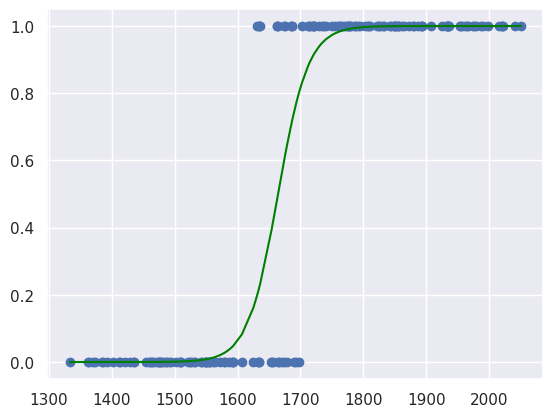

In [ ]:
x=sm.add_constant(x1) # Adding constant
result=sm.Logit(y,x).fit() # Apply model and train
def myfun(x,b0,b1): #Only for understaning
  return np.array(np.exp(b0+b1*x)/(1+np.exp(b0+b1*x)))

yhat=np.sort(myfun(x1,result.params[0],result.params[1]))
x_=np.sort(np.array(x1))

plt.scatter(x1,y)
plt.plot(x_,yhat,color="Green")
plt.show()

In [ ]:
result.predict()

array([3.17509804e-06, 9.95320711e-01, 9.99994789e-01, 3.82545559e-01,
       4.74688306e-02, 9.78241219e-01, 9.90489815e-01, 9.99913075e-01,
       9.99932439e-01, 2.80555331e-02, 9.99693576e-01, 9.99883365e-01,
       4.95824098e-01, 3.31130788e-06, 7.68780343e-01, 9.99588875e-01,
       2.11008877e-01, 2.18086901e-01, 2.32751342e-01, 9.99666730e-01,
       9.99998697e-01, 9.99999144e-01, 3.78484857e-05, 1.40058570e-03,
       9.11780281e-01, 9.99878362e-01, 2.18086901e-01, 9.96920696e-01,
       9.99571245e-01, 9.84988046e-01, 1.86723145e-04, 6.09532977e-01,
       4.12717426e-01, 9.99999674e-01, 9.99588875e-01, 9.99781012e-01,
       4.95824098e-01, 9.99836790e-01, 3.92515016e-01, 1.11951035e-05,
       3.72881439e-02, 1.97361936e-01, 9.99986307e-01, 4.26043595e-06,
       9.97797608e-01, 2.70466415e-05, 9.83006220e-01, 3.81272805e-04,
       5.56342322e-04, 1.28281107e-02, 7.78868807e-03, 9.99999908e-01,
       7.97292345e-01, 6.06406209e-03, 9.99987928e-01, 7.99999369e-06,
      

In [ ]:
cm_df=pd.DataFrame(result.pred_table())
cm_df.columns=["Predicted 0","Predicted 1"]
cm_df=cm_df.rename({0:"Actual 0",1:"Actual 1"})
cm_df

,Predicted 0,Predicted 1
Actual 0,67.0,7.0
Actual 1,7.0,87.0


# ***Finding accuracy***

In [ ]:
cm=np.array(cm_df)
acc=(cm[0,0]+cm[1,1])/cm.sum()
print(acc*100)

91.66666666666666


# Independent - Gender
# Dependent - Admitted


Optimization terminated successfully.
         Current function value: 0.572260
         Iterations 5


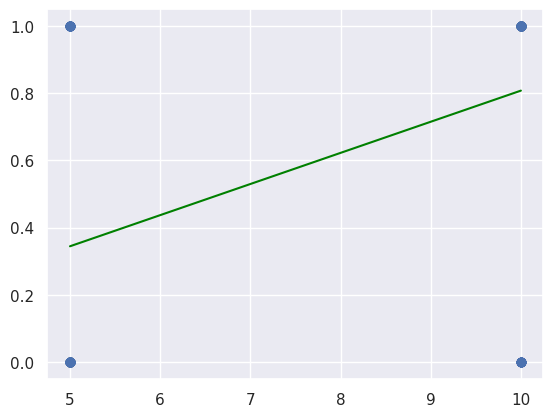

In [ ]:
x1=df["Gender"]
y=df["Admitted"]
x=sm.add_constant(x1)
result=sm.Logit(y,x).fit()
def myfun(x,b0,b1):
  return np.array(np.exp(b0+b1*x))/(1+np.exp(b0+b1*x))
yhat=np.sort(myfun(x1,result.params[0],result.params[1]))
x_=np.sort(np.array(x1))

plt.scatter(x1,y)
plt.plot(x_,yhat,color="green")
plt.show()

In [ ]:
cm_df=pd.DataFrame(result.pred_table())
cm_df.columns=["Predicted 5","Predicted 10"]
cm_df=cm_df.rename({0:"Actual 5",1:"Actual 10"})
cm_df

,Predicted 5,Predicted 10
Actual 5,59.0,15.0
Actual 10,31.0,63.0


In [ ]:
cm=np.array(cm_df)
acc=(cm[0,0]+cm[1,1])/cm.sum()
print(acc*100)

72.61904761904762


# Independent - Marks and gender
# Dependent - Admitted

In [ ]:
y=df["Admitted"]
x1=df[["Marks","Gender"]]
x=sm.add_constant(x1)
result_log = sm.Logit(y,x).fit()
result_log.pred_table()
cm_df=pd.DataFrame(result_log.pred_table())
cm_df.columns=["predicted 0","predicted 1"]
cm_df=cm_df.rename(index={0:"actual 0",1:"actual 1"})
cm_df
cm=np.array(cm_df)
acc=(cm[0,0]+cm[1,1])/cm.sum()
print(acc*100)
result_log.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10
94.64285714285714


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Sun, 24 Mar 2024   Pseudo R-squ.:                  0.8249
Time:                        16:33:13   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -70.2937     16.628     -4.227      0.000    -102.884     -37.703
Marks          0.0406      0.010      4.129      0.000       0.021       0.060
Gender         0.3890      0.169      2.299      0.022       0.057       0.721
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
cm=np.array(cm_df)
acc=(cm[0,0]+cm[1,1])/cm.sum()
print(acc*100)

94.64285714285714


In [ ]:
import plotly.express as px

In [ ]:
fig=px.scatter(df, x="Marks",y="Admitted", color="Gender")
fig.show()